<a href="https://colab.research.google.com/github/This-is-joejoe/Bank-Customer-Churn-Prediction/blob/main/Supervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction

In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Selection)

# Part 0: Setup Google Drive Environment
check this [link](https://colab.research.google.com/notebooks/io.ipynb) for more info

In [111]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [112]:
link = 'https://drive.google.com/open?id=1_avoMVzEnP_GdAe57ubMP0CpGTbs0ayu'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv') 

In [113]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [114]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv('bank_churn.csv')

In [115]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
print ("Num of rows: " + str(churn_df.shape[0])) # row count
print ("Num of columns: " + str(churn_df.shape[1])) # col count

Num of rows: 10000
Num of columns: 14


In [117]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [118]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [119]:
# Get target variable
y = churn_df['Exited']


In [120]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[20.37]


### Part 1.2:  Understand the features

In [121]:
# check missing values
churn_df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [122]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [123]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [124]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

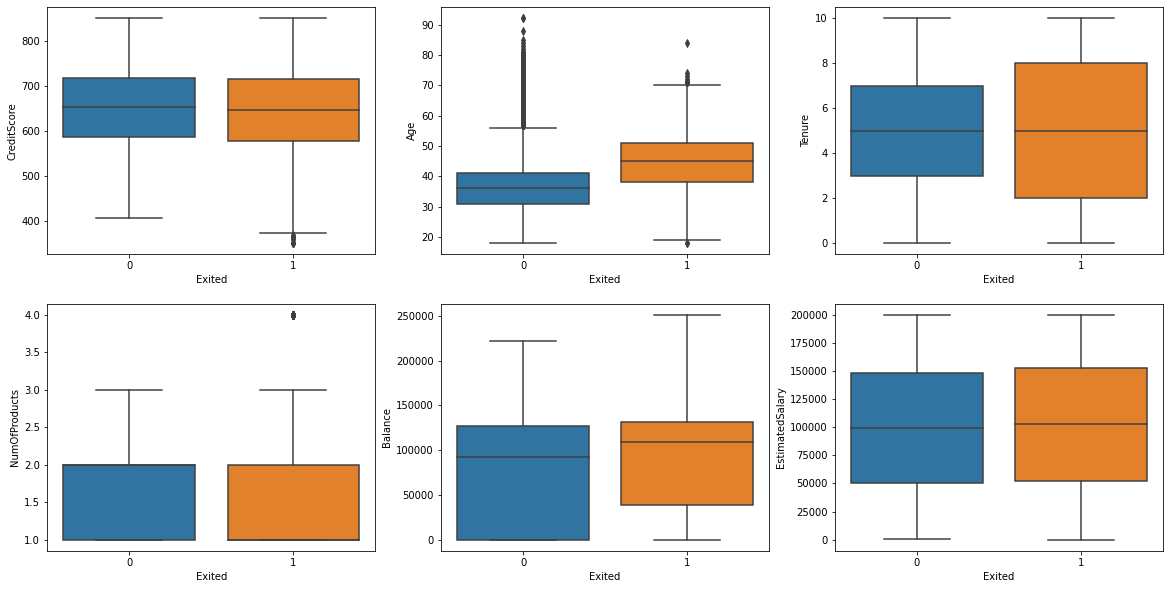

In [125]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

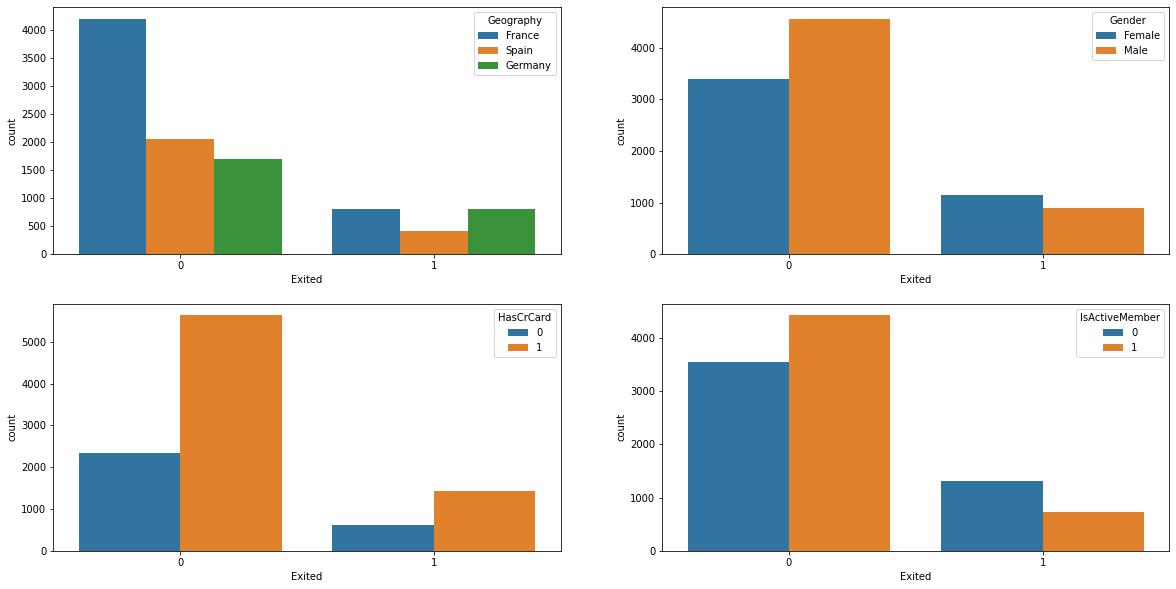

In [126]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

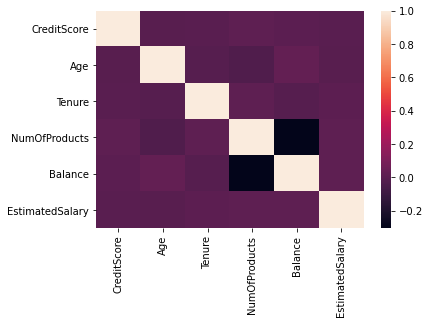

In [127]:
# correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [128]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


# Part 2: Feature Preprocessing

feature encoding, feature scaling

Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](https://contrib.scikit-learn.org/categorical-encoding/#category-encoders).

In [129]:
# ordinal encoding
churn_df['Gender'] = churn_df['Gender'] == 'Female'

In [130]:
# one hot encoding
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)

In [131]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,True,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1
5,6,15574012,Chu,645,False,44,8,113755.78,2,1,0,149756.71,1,0,1
6,7,15592531,Bartlett,822,False,50,7,0.00,2,1,1,10062.80,0,0,0
7,8,15656148,Obinna,376,True,29,4,115046.74,4,1,0,119346.88,1,1,0
8,9,15792365,He,501,False,44,4,142051.07,2,0,1,74940.50,0,0,0
9,10,15592389,H?,684,False,27,2,134603.88,1,1,1,71725.73,0,0,0


In [132]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [133]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [134]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 11 features
test data has 2500 observation with 11 features


In [135]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Part 3.2: Model Training and Selection

In [136]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [137]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [139]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8024

In [140]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81666667 0.81       0.81066667 0.82133333 0.81333333]
Model accuracy of Logistic Regression is 0.8144
[0.844      0.826      0.82666667 0.83266667 0.82466667]
Model accuracy of KNN is 0.8308
[0.87466667 0.84866667 0.86266667 0.864      0.86133333]
Model accuracy of Random Forest is 0.8622666666666667


In [141]:
#@title SVM implementation

from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))


Model accuracy of SVM is: 0.8581333333333333


###  Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [142]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [143]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8145333333333333
Best parameters set:
C:1
penalty:l2


In [145]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [146]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8358666666666668
Best parameters set:
n_neighbors:9


In [148]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [149]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [150]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8621333333333334
Best parameters set:
n_estimators:60


In [151]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

####Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.862
precision is: 0.7484848484848485
recall is: 0.48526522593320237


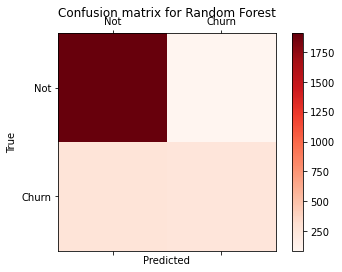

Logistic Regression
Accuracy is: 0.8024
precision is: 0.5369458128078818
recall is: 0.21414538310412573


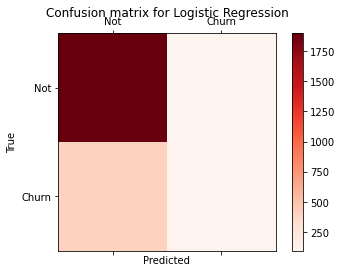

K nearest neighbor
Accuracy is: 0.8312
precision is: 0.6570397111913358
recall is: 0.3575638506876228


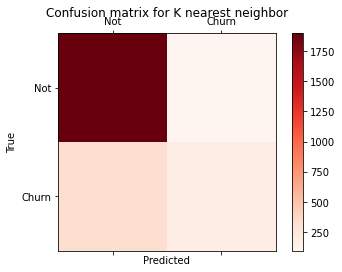

In [153]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [154]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [155]:
best_RF_model.predict_proba(X_test)

array([[0.58333333, 0.41666667],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       ...,
       [0.13333333, 0.86666667],
       [0.91666667, 0.08333333],
       [0.98333333, 0.01666667]])

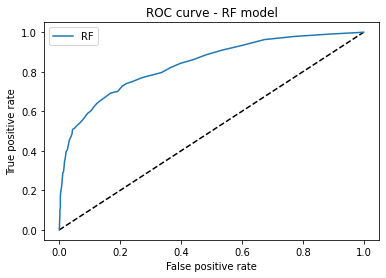

In [156]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [157]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8385194080631999

#### Part 3.4.1: ROC of LR Model

In [158]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [159]:
best_LR_model.predict_proba(X_test)

array([[0.68481382, 0.31518618],
       [0.1881542 , 0.8118458 ],
       [0.82453063, 0.17546937],
       ...,
       [0.30549247, 0.69450753],
       [0.92661984, 0.07338016],
       [0.85106288, 0.14893712]])

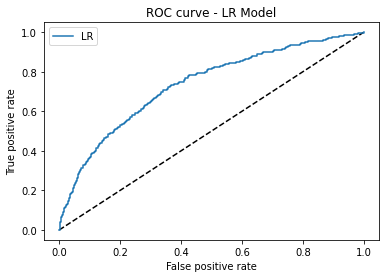

In [160]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [161]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7341228060654084

# Part 4: Feature Importance

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in

In [162]:
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,True,42,2,0.00,1,1,1,101348.88,0,0,700320.7608
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1,777669.2278
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0,787267.1487
3,699,True,39,1,0.00,2,0,0,93826.63,0,0,648342.0133
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1,546471.1310


In [163]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7495
IsActiveMember : -0.5239
Geography_Germany : 0.3251
Gender : 0.254
Balance : 0.159
CreditScore : -0.0568
NumOfProducts : -0.0528
Tenure : -0.0384
EstimatedSalary : 0.0164
HasCrCard : -0.0131
SalaryInRMB : 0.0038
Geography_Spain : 0.0027


In [164]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5271
Geography_Germany : 0.3313
Gender : 0.2591
Balance : 0.1624
CreditScore : -0.0637
NumOfProducts : -0.0585
Tenure : -0.0452
HasCrCard : -0.0199
Geography_Spain : 0.0139
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [165]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2395
EstimatedSalary : 0.149
CreditScore : 0.1444
Balance : 0.143
NumOfProducts : 0.1246
Tenure : 0.0809
IsActiveMember : 0.0423
Geography_Germany : 0.0269
HasCrCard : 0.0178
Gender : 0.0176
Geography_Spain : 0.0141
